In [1]:
import os
import zipfile
import random
import shutil
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from os import getcwd

In [14]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
# YOUR CODE STARTS HERE
    files = []
    for filename in os.listdir(SOURCE):
            file = SOURCE + filename
            if os.path.getsize(file) > 0:
                files.append(filename)
            else:
                print(filename + " is zero length, so ignoring.")

    training_length = int(len(files) * SPLIT_SIZE)
    testing_length = int(len(files) - training_length)
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    testing_set = shuffled_set[-testing_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)

    for filename in testing_set:
        this_file = SOURCE + filename
        destination = TESTING + filename
        copyfile(this_file, destination)
# YOUR CODE ENDS HERE


SPILL_SOURCE_DIR = "D:/PROS/dataset/spill/"
TRAINING_SPILL_DIR = "D:/PROS/dataset/training/spill/"
TESTING_SPILL_DIR = "D:/PROS/dataset/testing/spill/"
SAFE_SOURCE_DIR ="D:/PROS/dataset/safe/"
TRAINING_SAFE_DIR = "D:/PROS/dataset/training/safe/"
TESTING_SAFE_DIR = "D:/PROS/dataset/testing/safe/"

split_size = .9
split_data(SPILL_SOURCE_DIR, TRAINING_SPILL_DIR, TESTING_SPILL_DIR, split_size)
split_data(SAFE_SOURCE_DIR, TRAINING_SAFE_DIR, TESTING_SAFE_DIR, split_size)


print(len(os.listdir('D:/PROS/dataset/training/spill/')))
print(len(os.listdir('D:/PROS/dataset/training/safe/')))
print(len(os.listdir('D:/PROS/dataset/testing/spill/')))
print(len(os.listdir('D:/PROS/dataset/testing/safe/')))


341
765
245
466


In [15]:
TRAINING_DIR = "D:/PROS/dataset/training/"
train_datagen = ImageDataGenerator(rescale=1.0/255,rotation_range=40,
                                 # width_shift_range=0.2,
                                 # height_shift_range=0.2,
                                 # shear_range=0.2,
                                 # zoom_range=0.2,
                                 # horizontal_flip=True,
                                 # fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=5,
                                                    class_mode='binary',
                                                    target_size=(150, 150))

VALIDATION_DIR = "D:/PROS/dataset/testing/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=5,
                                                              class_mode='binary',
                                                              target_size=(150, 150))

Found 1106 images belonging to 2 classes.
Found 711 images belonging to 2 classes.


In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

model.compile(optimizer=RMSprop(lr=0.0001), loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [17]:
history = model.fit_generator(train_generator,
                              epochs=20,
                              verbose=1,
                              validation_data=validation_generator)


Epoch 1/20
222/222 [==============================] - 29s 130ms/step - loss: 0.5305 - acc: 0.7387 - val_loss: 0.3391 - val_acc: 0.9044
Epoch 2/20
222/222 [==============================] - 29s 130ms/step - loss: 0.2713 - acc: 0.8996 - val_loss: 0.1864 - val_acc: 0.9494
Epoch 3/20
222/222 [==============================] - 30s 133ms/step - loss: 0.1861 - acc: 0.9340 - val_loss: 0.1120 - val_acc: 0.9606
Epoch 4/20
222/222 [==============================] - 30s 134ms/step - loss: 0.1377 - acc: 0.9485 - val_loss: 0.0684 - val_acc: 0.9733
Epoch 5/20
222/222 [==============================] - 28s 127ms/step - loss: 0.1079 - acc: 0.9575 - val_loss: 0.0775 - val_acc: 0.9733
Epoch 6/20
222/222 [==============================] - 27s 121ms/step - loss: 0.0786 - acc: 0.9720 - val_loss: 0.0293 - val_acc: 0.9902
Epoch 7/20
222/222 [==============================] - 27s 121ms/step - loss: 0.0652 - acc: 0.9738 - val_loss: 0.0345 - val_acc: 0.9873
Epoch 8/20
222/222 [==============================] - 2

In [19]:
model.save('mymodelmilk.h5',overwrite=True)

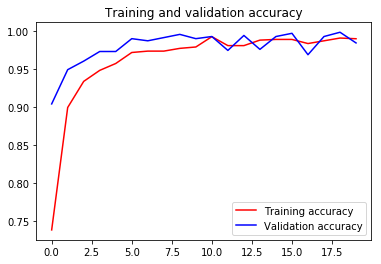

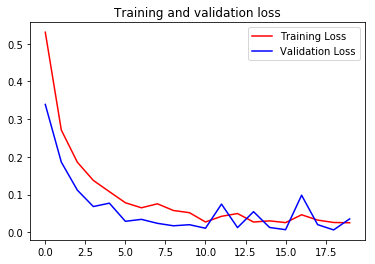

In [18]:

%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()